# DataMadness
## EDA (fancy plots)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 18
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
db = pd.read_csv('db_files/db_cleaned.csv')

#### Titus Livius superstar

Born in 59 and dead in 17, amazing guy

In [3]:
titus = db[db['deathYear'] < 1200]
db = db.drop(index= db[db['deathYear'] < 1200].index)
titus

,Unnamed: 0,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,pnconst,pcategory,region,types,nconst,primaryName,birthYear,deathYear,primaryProfession
242133,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,10,nm0830615,editor,ZA,imdbDisplay,nm0515385,Titus Livius,59,17,writer
242154,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,1,nm0005132,actor,MX,imdbDisplay,nm0515385,Titus Livius,59,17,writer
242175,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,2,nm0004692,actor,TW,imdbDisplay,nm0515385,Titus Livius,59,17,writer
242196,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,3,nm0001722,actor,LT,imdbDisplay,nm0515385,Titus Livius,59,17,writer
242217,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,4,nm0815370,actress,PT,imdbDisplay,nm0515385,Titus Livius,59,17,writer
242238,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,5,nm0001338,director,PE,imdbDisplay,nm0515385,Titus Livius,59,17,writer
242259,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,6,nm0085542,producer,SG,imdbDisplay,nm0515385,Titus Livius,59,17,writer
242280,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,7,nm0887800,producer,VN,imdbDisplay,nm0515385,Titus Livius,59,17,writer
242301,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,8,nm0001980,composer,ES,imdbDisplay,nm0515385,Titus Livius,59,17,writer
242322,177170,tt0183790,A Knight's Tale,A Knight's Tale,0,2001,2001,132,"Action,Adventure,Romance",6.9,190918.0,9,nm0337313,cinematographer,PL,imdbDisplay,nm0515385,Titus Livius,59,17,writer


In [4]:
db.shape

(558162, 21)

In [5]:
db = db.reindex().drop(columns='Unnamed: 0')
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558162 entries, 0 to 558171
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             558162 non-null  object 
 1   primaryTitle       558162 non-null  object 
 2   originalTitle      558162 non-null  object 
 3   isAdult            558162 non-null  int64  
 4   startYear          558162 non-null  int64  
 5   endYear            558162 non-null  int64  
 6   runtimeMinutes     558162 non-null  int64  
 7   genres             558162 non-null  object 
 8   averageRating      558162 non-null  float64
 9   numVotes           558162 non-null  float64
 10  ordering           558162 non-null  int64  
 11  pnconst            558162 non-null  object 
 12  pcategory          558162 non-null  object 
 13  region             558162 non-null  object 
 14  types              558162 non-null  object 
 15  nconst             558162 non-null  object 
 16  pr

### Distribution of Average Rating variable
The variable we want to get insights on

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


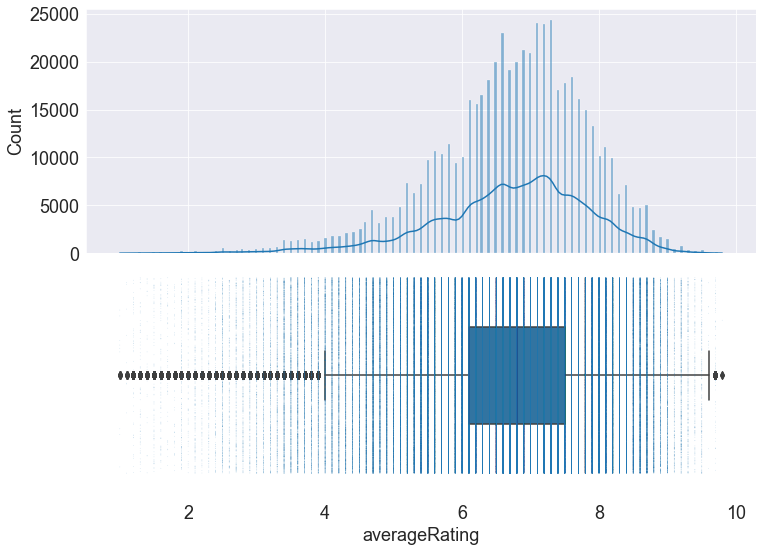

In [6]:
fig1, axs = plt.subplots(nrows=2)

sns.histplot(db['averageRating'], kde=True, ax=axs[0])
sns.stripplot(db['averageRating'], orient='h', jitter=0.4, size=.8, ax=axs[1], alpha=0.2)
sns.boxplot(db['averageRating'], orient='h', width=0.4, ax=axs[1], showfliers=True)

spacer = np.max(db['averageRating']) * 0.05
xmin = np.min(db['averageRating']) - spacer
xmax = np.max(db['averageRating']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

plt.subplots_adjust(hspace=0)
axs[1].set_facecolor('white')

#### Compare to Number of Votes

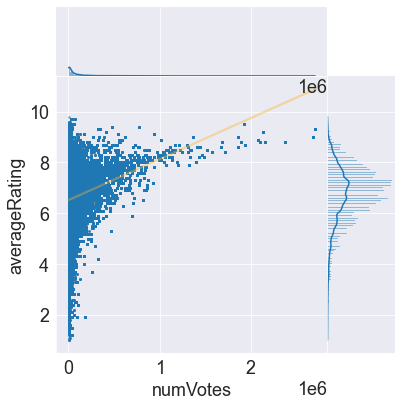

In [8]:
sns.jointplot(
    x='numVotes', y='averageRating', data=db, kind="reg", ratio=4, space=0,
    scatter_kws={'s': 3,'alpha': 0.25}, line_kws={'color': 'orange', 'alpha':0.3}
)

votes come from 131 different regions

In [9]:
len(db.region.unique())

131

In [10]:
def plot_correlation_categorical(df, col, agg, n_top):
    var = df.groupby(col).agg(agg).sort_values('averageRating', ascending = False).head(n_top)
    db_filtered = df[df[col].isin(var.index)]
    fig, axs = plt.subplots(nrows=2, figsize=(32,24))
    sns.boxplot(x=col,y='averageRating',data= db_filtered,ax=axs[0])
    sns.countplot(x=col,data= db_filtered.sort_values(col),ax=axs[1])
    axs[0].axhline(y=db['averageRating'].median(),color='red',linestyle='dotted')

    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90, size=20)
    axs[0].xaxis.set_visible(False)

        # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

## Region
Display categorical region value together with the count of averageRating labels to determine which region has higher rate of vote in the db, then compare it to the average rating of the region itself.

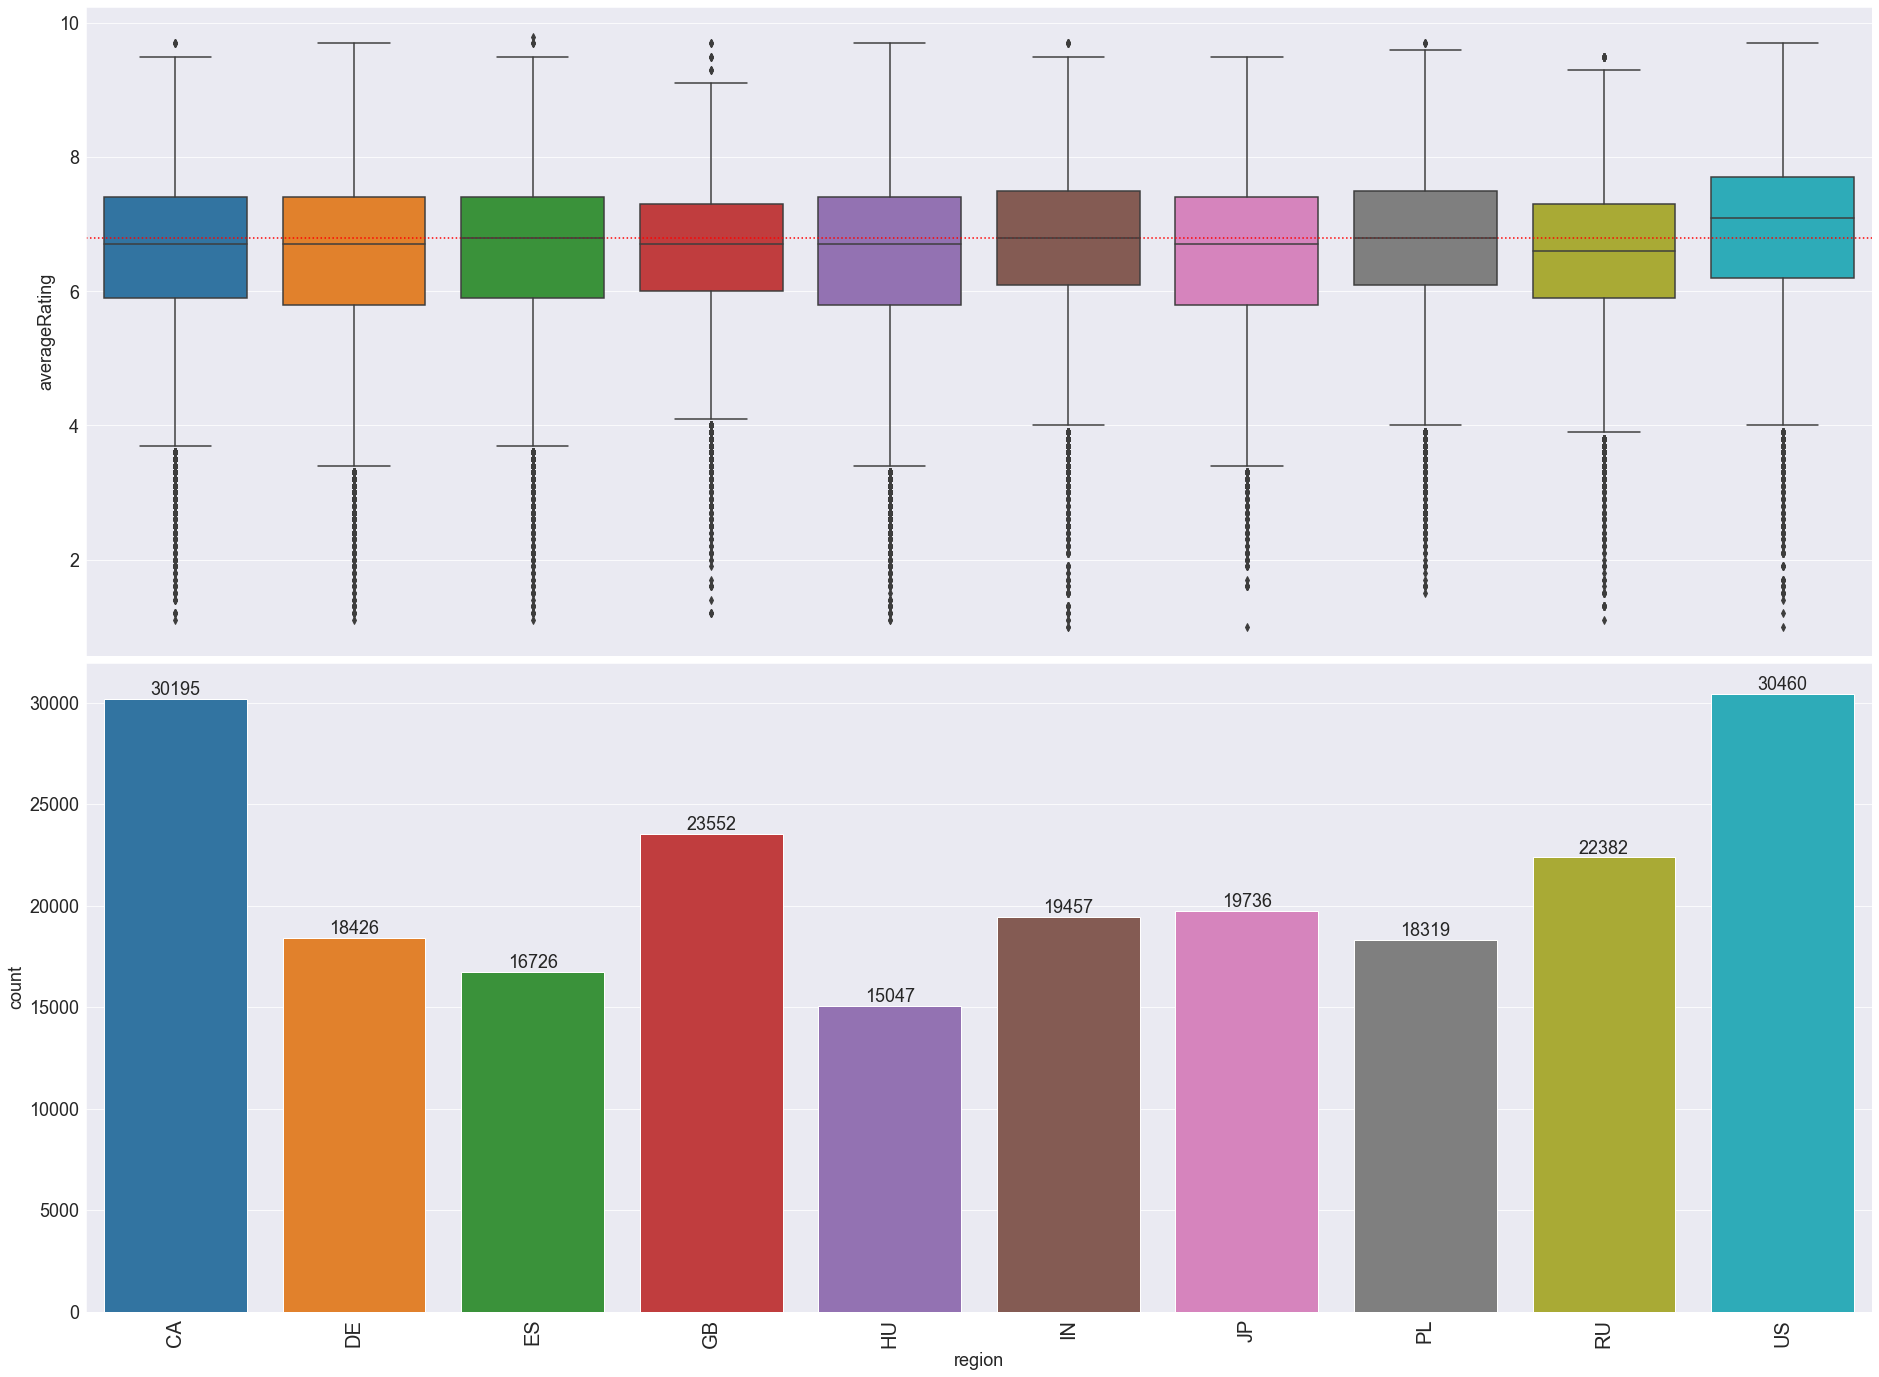

In [11]:
plot_correlation_categorical(db, 'region', {'averageRating':'count'}, 10)

### Correlation of numeric variables
This shows averageRating being correlated to numVotes which makes sense, and startYear to endYear (again understandable).
Small correlation also between runtimeMinutes and averageRating: *investigate*

<AxesSubplot:>

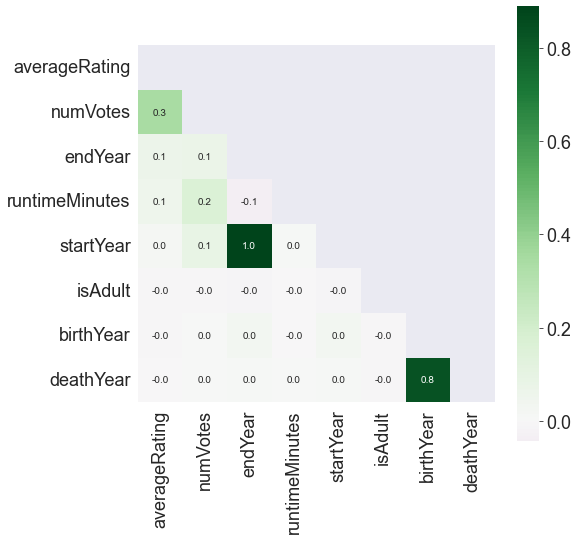

In [12]:
dset = db.drop(columns=['ordering'])
s = dset.corr().loc[:, 'averageRating'].abs().sort_values(ascending=False)
s = dset.loc[:, list(s.index)].corr()
mask = np.zeros_like(s)
mask[np.triu_indices_from(mask)] = 1
plt.figure(figsize=(8, 8))
sns.heatmap(s, mask=mask, square=True, cmap='PRGn', center=0, robust=True, annot=True, annot_kws={"size":10}, fmt='.1f')

### pairplot for numerical variables

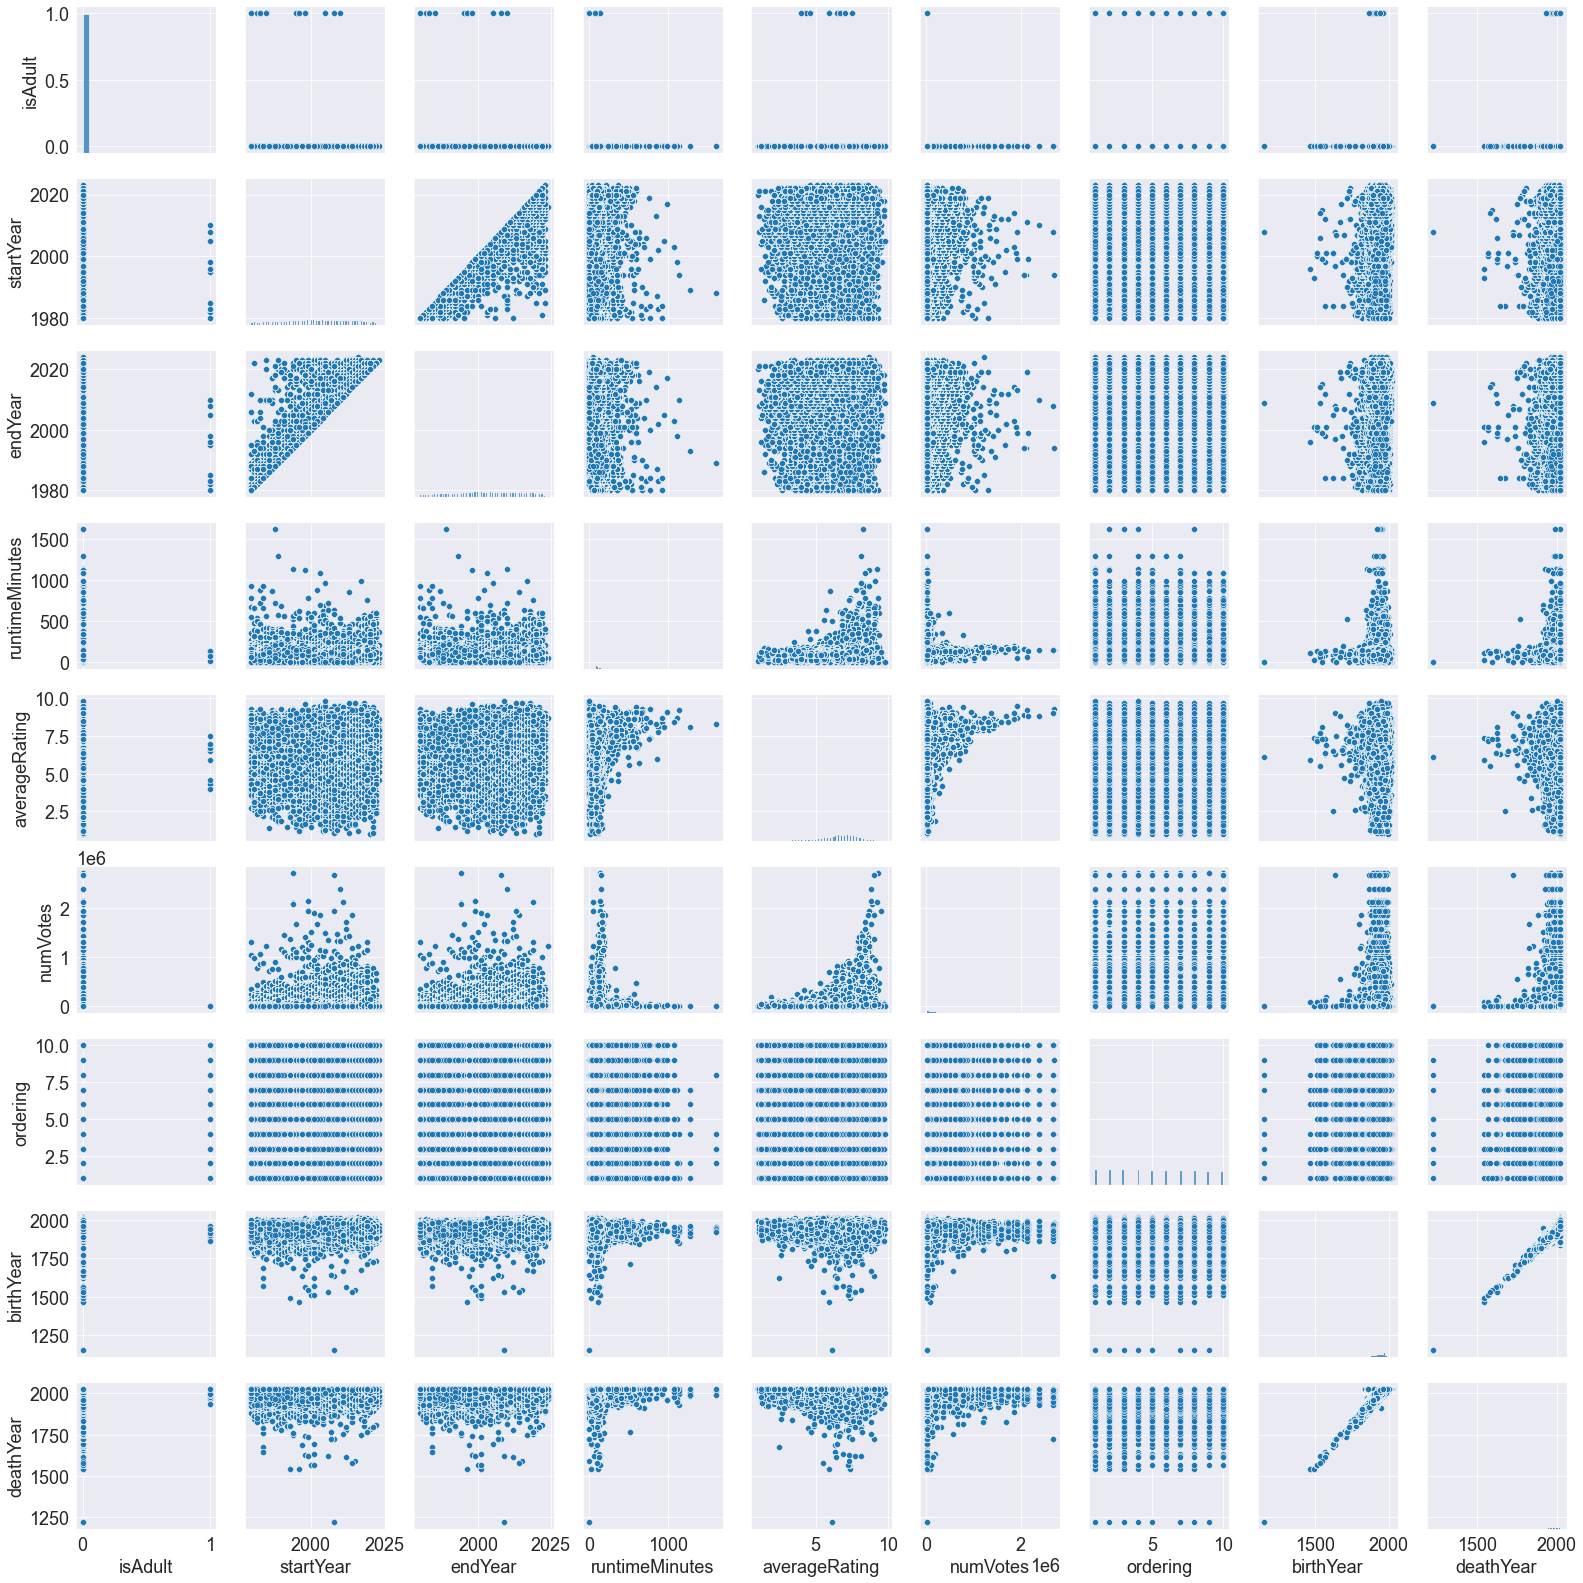

In [13]:
numeric = db.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
sns.pairplot(numeric)

### Most recurrent titles
series with high number of episodes, or movies with many replicas

In [15]:
aggregator = {'ordering':'count','averageRating':'mean','numVotes':'sum'}
longest_series = db.groupby('primaryTitle').agg(aggregator).sort_values('ordering', ascending = False).head(25)
longest_series

,ordering,averageRating,numVotes
primaryTitle,,,
Alarm für Cobra 11 - Die Autobahnpolizei,1395,6.300000,7742250.0
EastEnders,1020,4.700000,8840340.0
Law & Order,784,7.800000,31534048.0
Law & Order: Special Victims Unit,664,8.100000,73612368.0
Hospital Central,648,5.500000,460080.0
Star Trek: The Next Generation,639,8.700000,79209801.0
WWE Smackdown!,544,7.200000,3548512.0
Casualty,540,6.100000,1716660.0
ER,504,7.900000,31796856.0


### Top-rated titles
titles where averageRating is the highest

In [31]:
aggregator = {'tconst':'first','startYear':'first','averageRating':'mean','numVotes':'sum'}
bestMovies = db.groupby('primaryTitle').agg(aggregator).sort_values('averageRating', ascending=False)
bestMovies.head(20)

,tconst,startYear,averageRating,numVotes
primaryTitle,,,,
Choufli Hal,tt7151672,2005,9.800000,5178.0
Red Dead Redemption II,tt6161168,2018,9.700000,1471015.0
The Witcher 3: Wild Hunt,tt2993508,2015,9.700000,692640.0
The Last of Us,tt2140553,2013,9.700000,1084640.0
Metal Gear Solid,tt0180825,1998,9.600000,72456.0
The Legend of Zelda: Ocarina of Time,tt0184666,1998,9.600000,79576.0
Red Dead Redemption,tt1479962,2010,9.500000,249975.0
The Last Drive-In with Joe Bob Briggs,tt8284230,2018,9.500000,12656.0
Metal Gear Solid 3: Snake Eater,tt0365498,2004,9.500000,171072.0


### Top-rated actors
based on movie ratings

In [54]:
actors = db[(db.primaryProfession.isin(['actor','actress'])) & db.tconst.isin(bestMovies.tconst)]
actors.groupby(['tconst']).aggregate(
    {'primaryName':lambda x: ', '.join(x.unique()), 'primaryTitle':'first','averageRating':'mean', 'numVotes':'max'}
).sort_values('averageRating',ascending=False).head(20)

,primaryName,primaryTitle,averageRating,numVotes
tconst,,,,
tt2993508,"Alex Miteff, Maximilian Pfaff",The Witcher 3: Wild Hunt,9.7,28860.0
tt6161168,Callum McInerney,Red Dead Redemption II,9.7,42029.0
tt0180825,"Herminia de la Fuente, Ryan James",Metal Gear Solid,9.6,12076.0
tt0365498,"Kathryn Apanowicz, Mary Hartline, Midge Ware",Metal Gear Solid 3: Snake Eater,9.5,10692.0
tt8284230,Bartho Braat,The Last Drive-In with Joe Bob Briggs,9.5,1582.0
tt0903747,"Candy Apples, Colette Bertrand, Eleonora Massa...",Breaking Bad,9.5,1929373.0
tt1540125,"Sevda Ferdag, Aarón Hernán, Jørgen Samson",Mass Effect 2,9.5,20450.0
tt11960634,Mr. Faisu,Me Vasantrao,9.4,514.0
tt0185906,"France Arnel, Orlando Drummond, Roger Frost, W...",Band of Brothers,9.4,476251.0
